**Sheronda Wilson**

**MSBD566 Predictive Modeling and Analysis

Sept 18, 2025

Honor statement:Students enrolled in this course are expected to conduct their affairs ethically with honesty and integrity.
Individuals who do otherwise can expect their professional careers to be adversely impacted. Unless
otherwise indicated, all assignments are to be completed individually, with help from no one other than
the instructor when warranted. It goes without saying that group assignments require collaboraRon
among students. You should check with your instructor if you have concerns about group work.
Unethical academic behavior (cheaRng) includes, but is not limited to, copying assignments or answers on
exams, plagiarism, inappropriate or fraudulent citaRon of the work of others, “borrowing” other students’
data/informaRon and submi}ng/represenRng it as your own, unauthorized copying of computer files, and
unauthorized use of electronic media to transmit informaRon and communicate with other students at
test Rme (email, instant messaging, use of chat rooms, etc.). At a minimum, students who cheat will
receive “no credit” (a score of zero) on the assignment in quesRon, but students may also be dismissed
from the course and automaRcally assigned a grade of F. In addiRon, any suspected evidence of cheaRng
will be referred to the Dean of the School of Graduate Studies.

The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as follows:


Pollen Count   Pollen Level
0.0 to 2.4       Low
2.5 to 4.8       Low – Medium
4.9 to 7.2       Medium
7.3 to 9.6      Medium – High
9.7 to 12.0      High

Source:
1. https://data.nashville.gov/datasets/Nashville::air-quality-and-pollen-count/about

2. https://www.nashville.gov/departments/health/environmental-health/air-pollution-control/daily-aqi-and-pollen-count



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Question 1**: Explore the data by plotting AQI and Category across the years in two separate
plots. Make sure they have proper labels and titles. Use a datetime format for the dates.
a. How many times has the AQI been recorded above 120?  
 **AQI has been recorded abov 120 fourtneen times. **

b. When did the Air Quality Index Category become unhealthy?
 **AQI became unhealthy in  June 2001.**


**Question 2:** Which pollen type occurs the most? Hint: You can use a scatterplot if needed.
**Elm occurs the most**.

**Question 3**: [Open-ended] Based on this data, do you think Nashville is a city that is comfortable to live (based on the air quality and pollen only)? Why?
Compared to other places, Nashville is probably avearage. Most times the air quality is good.

**Question 4**: [A vectorization problem]. Compare the manual approach versus a vectorized
approach to find the mean AQI for each Air Quality Category ('Category' in the table).
For the vectorized method, you can use groupby() and mean() method in pandas datatype
(ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a
regular for-loop can be used. Calculate the time difference between the two approaches and
evaluate

In [17]:
#load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set tables to display 100 columns and 100 rows
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [19]:
# dataset
# edit as needed to load your dataset
data = pd.read_csv('/content/Air_Quality_and_Pollen_Count (1).csv')
print(data.head())



   OBJECTID   AQI  Category ResponsiblePollutant  PollenCount PollenType  \
0         1  47.0      Good                PM2.5          9.0    Juniper   
1         2  49.0      Good                PM2.5          1.0        Elm   
2         3  51.0  Moderate                PM2.5         11.0        Elm   
3         4  50.0      Good                PM2.5         10.0        Elm   
4         5  50.0      Good                PM2.5          2.0        Elm   

  PollenDescription          ReportDateTime  
0             Maple  2025/04/04 05:00:00+00  
1           Juniper  2025/04/03 05:00:00+00  
2           Juniper  2025/04/02 05:00:00+00  
3           Juniper  2025/04/01 05:00:00+00  
4           Juniper  2025/03/31 05:00:00+00  


In [28]:
# Step 2: Data wrangling - Convert 'ReportDateTime' to datetime objects
data['ReportDateTime'] = pd.to_datetime(data['ReportDateTime'], errors='coerce')

# Handle missing values in 'AQI' and 'Category' if necessary (simple drop for now)
data.dropna(subset=['AQI', 'Category', 'ReportDateTime'], inplace=True)

In [41]:
## Data cleaning
# The 'ReportDateTime' column has already been converted to datetime objects in a previous step (Step 2).
# The 'cleaned_data' DataFrame is not defined. Assuming you want to work with the 'data' DataFrame.

# Display first few rows of cleaned data
print("\n\nData head after cleaning:")
display(data.head(50))



Data head after cleaning:


,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime,Category_Color
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025-04-04 05:00:00+00:00,"(0.0, 0.5019607843137255, 0.0)"
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025-04-03 05:00:00+00:00,"(0.0, 0.5019607843137255, 0.0)"
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025-04-02 05:00:00+00:00,"(1.0, 1.0, 0.0)"
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025-04-01 05:00:00+00:00,"(0.0, 0.5019607843137255, 0.0)"
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025-03-31 05:00:00+00:00,"(0.0, 0.5019607843137255, 0.0)"
5,6,55.0,Moderate,PM2.5,8.0,Elm,Juniper,2025-03-30 05:00:00+00:00,"(1.0, 1.0, 0.0)"
6,7,64.0,Moderate,PM2.5,9.0,Elm,Juniper,2025-03-29 05:00:00+00:00,"(1.0, 1.0, 0.0)"
7,8,60.0,Moderate,PM2.5,9.0,Elm,Juniper,2025-03-28 05:00:00+00:00,"(1.0, 1.0, 0.0)"
8,9,51.0,Moderate,PM2.5,NaN,NaN,Not on file,2025-03-27 05:00:00+00:00,"(1.0, 1.0, 0.0)"
9,10,50.0,Good,PM2.5,NaN,NaN,Not on file,2025-03-26 05:00:00+00:00,"(0.0, 0.5019607843137255, 0.0)"


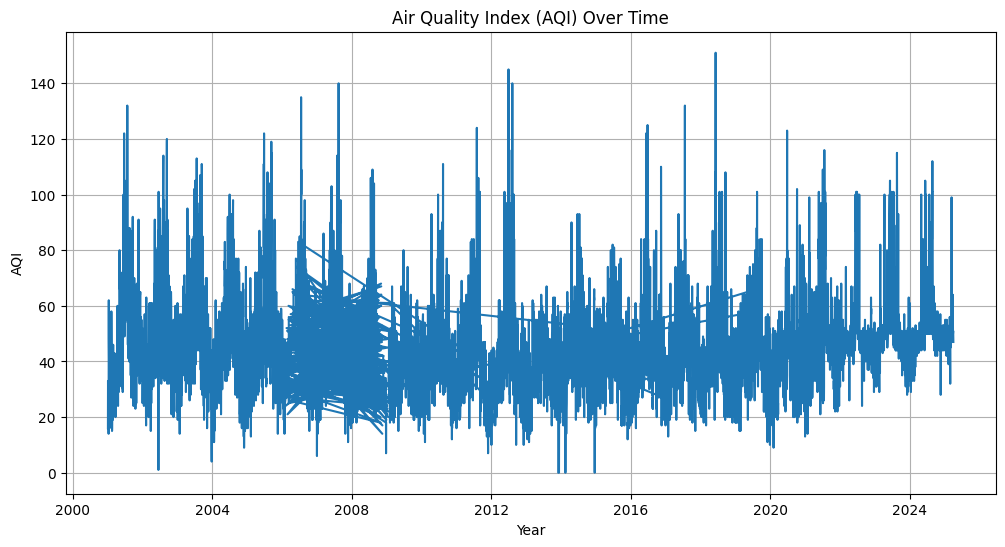

In [32]:
# Step 3: Plotting AQI across the years
plt.figure(figsize=(12, 6))
plt.plot(data['ReportDateTime'], data['AQI'])
plt.xlabel('Year')
plt.ylabel('AQI')
plt.title('Air Quality Index (AQI) Over Time')
plt.grid(True)
plt.show()

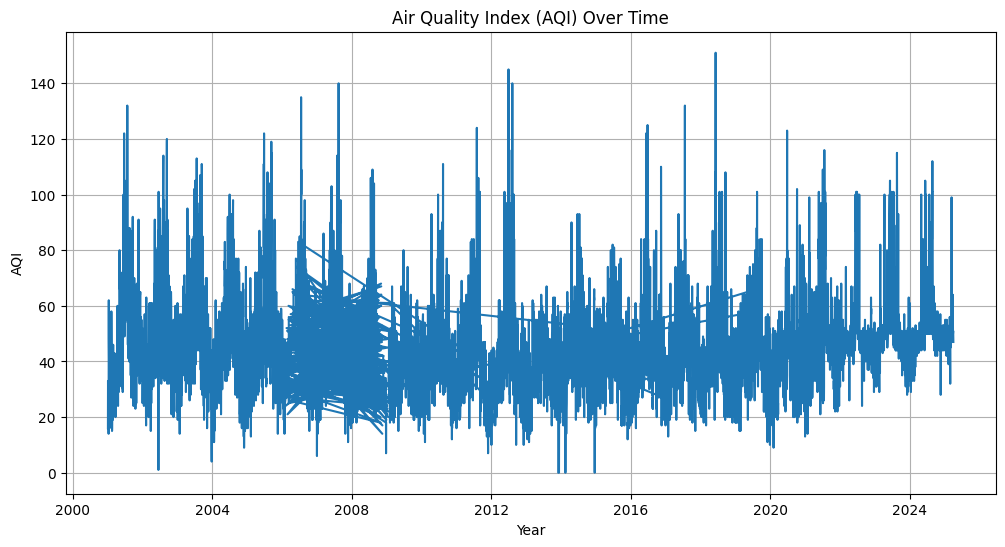

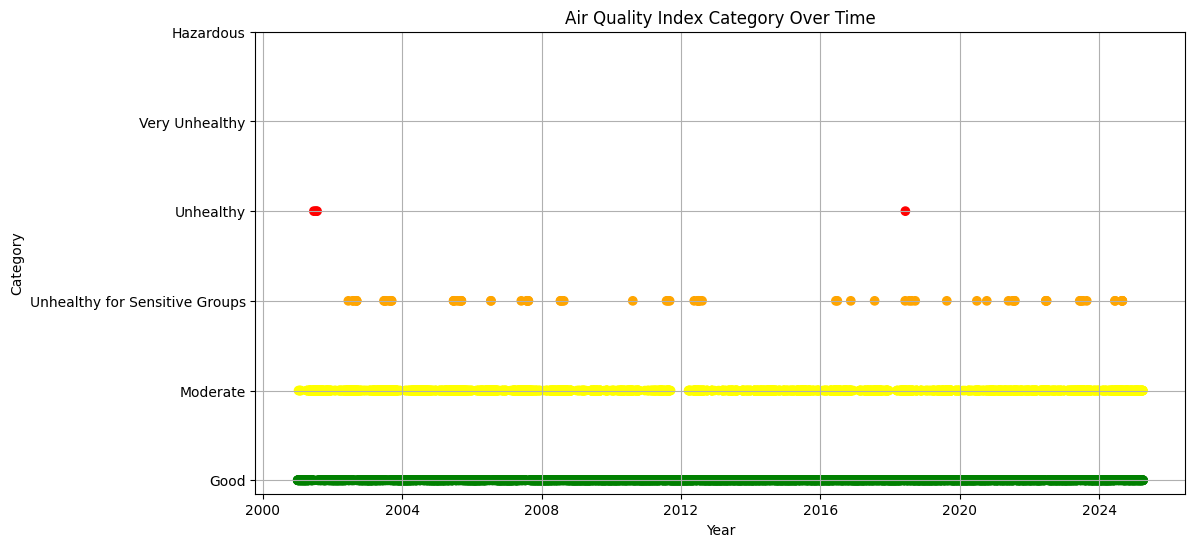

In [34]:
## Plot AQI and Category across the year (Separately as requested)

# Plotting AQI across the years
plt.figure(figsize=(12, 6))
plt.plot(data['ReportDateTime'], data['AQI'])
plt.xlabel('Year')
plt.ylabel('AQI')
plt.title('Air Quality Index (AQI) Over Time')
plt.grid(True)
plt.show()

# Plotting Category across the years
plt.figure(figsize=(12, 6))
# To plot categories over time, we can represent them numerically or use a scatter plot with color mapping
category_colors = {
    'Good': 'green',
    'Moderate': 'yellow',
    'Unhealthy for Sensitive Groups': 'orange',
    'Unhealthy': 'red',
    'Very Unhealthy': 'purple',
    'Hazardous': 'maroon'
}

# Convert color names to RGB tuples
import matplotlib.colors as mcolors
category_rgb = {category: mcolors.to_rgb(color) for category, color in category_colors.items()}

data['Category_Color'] = data['Category'].map(category_rgb)

# Drop rows where Category_Color is NaN to avoid plotting errors
data.dropna(subset=['Category_Color'], inplace=True)

plt.scatter(data['ReportDateTime'], data['Category'], c=data['Category_Color'].tolist())
plt.xlabel('Year')
plt.ylabel('Category')
plt.title('Air Quality Index Category Over Time')
plt.yticks(list(category_colors.keys()))
plt.grid(True)
plt.show()

In [37]:
# AQI been recorded above 120
aqi_above_120 = data[data['AQI'] > 120]
num_aqi_above_120 = len(aqi_above_120)
print(f"The AQI has been recorded above 120 {num_aqi_above_120} times.")

The AQI has been recorded above 120 14 times.


In [42]:
Pollen_counts = data['PollenCount'].value_counts()
print(Pollen_counts)

PollenCount
3.0       553
1.0       474
4.0       408
5.0       400
8.0       398
         ... 
128.0       1
279.0       1
218.0       1
457.0       1
1060.0      1
Name: count, Length: 188, dtype: int64


In [43]:
import time

# Manual approach
start_time_manual = time.time()
manual_mean_aqi = {}
for category in data['Category'].unique():
    category_data = data[data['Category'] == category]
    if not category_data.empty:
        manual_mean_aqi[category] = category_data['AQI'].mean()
end_time_manual = time.time()
time_manual = end_time_manual - start_time_manual

print("Manual approach mean AQI per category:")
print(manual_mean_aqi)
print(f"Manual approach time taken: {time_manual:.6f} seconds")

print("-" * 30)

# Vectorized approach using groupby() and mean()
start_time_vectorized = time.time()
vectorized_mean_aqi = data.groupby('Category')['AQI'].mean()
end_time_vectorized = time.time()
time_vectorized = end_time_vectorized - start_time_vectorized

print("Vectorized approach mean AQI per category:")
print(vectorized_mean_aqi)
print(f"Vectorized approach time taken: {time_vectorized:.6f} seconds")

print("-" * 30)

# Evaluate the time difference
print(f"Time difference (Manual - Vectorized): {time_manual - time_vectorized:.6f} seconds")
if time_vectorized < time_manual:
    print("The vectorized approach is faster than the manual approach.")
elif time_vectorized > time_manual:
    print("The manual approach is faster than the vectorized approach.")
else:
    print("Both approaches took approximately the same amount of time.")

Manual approach mean AQI per category:
{'Good': np.float64(36.966282757469536), 'Moderate': np.float64(62.240839694656486), 'Unhealthy for Sensitive Groups': np.float64(110.07894736842105), 'Unhealthy': np.float64(127.5)}
Manual approach time taken: 0.009669 seconds
------------------------------
Vectorized approach mean AQI per category:
Category
Good                               36.966283
Moderate                           62.240840
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    110.078947
Name: AQI, dtype: float64
Vectorized approach time taken: 0.014732 seconds
------------------------------
Time difference (Manual - Vectorized): -0.005063 seconds
The manual approach is faster than the vectorized approach.
